Data ingestion and preprocessing

In [1]:
#import ncessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNetCV 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_regression
import pickle

In [2]:
#loading the data sets into data frames
df_wine_train = pd.read_csv(r'wine_train.csv')
df_wine_test = pd.read_csv(r'wine_test.csv')

Checking and working on the train data set

In [3]:
#preview of the training data frame
display(df_wine_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,6.8,0.18,0.28,8.50,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,white,6
1,7.8,0.20,0.20,1.40,0.036,25.0,83.0,0.99088,3.03,0.46,11.7,white,6
2,5.8,0.24,0.28,1.40,0.038,40.0,76.0,0.98711,3.10,0.29,13.9,white,7
3,6.8,0.18,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,white,7
4,6.7,0.31,0.42,6.40,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,white,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6.9,0.28,0.40,8.20,0.036,15.0,95.0,0.99440,3.17,0.33,10.2,white,5
4543,6.0,0.38,0.26,3.50,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,white,7
4544,7.5,0.30,0.21,6.55,0.026,33.0,143.0,0.99244,2.92,0.35,11.1,white,5
4545,5.9,0.21,0.23,7.90,0.033,22.0,130.0,0.99440,3.38,0.59,10.9,white,6


In [4]:
# profilling the train data frame
df_wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4547 non-null   float64
 1   volatile acidity      4547 non-null   float64
 2   citric acid           4547 non-null   float64
 3   residual sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free sulfur dioxide   4547 non-null   float64
 6   total sulfur dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   pH                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  type                  4547 non-null   object 
 12  quality               4547 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 461.9+ KB


In [5]:
#check how many unique values are in the non-numeric column
df_wine_train['type'].nunique()

2

In [6]:
# check how many of each of the unique type
df_wine_train['type'].value_counts()

type
white    3432
red      1115
Name: count, dtype: int64

In [7]:
#Encoding the non-numeric column and checking to confirm if ok 
 
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df_wine_train['type_encoded'] = label_encoder.fit_transform(df_wine_train['type'])

#print(df_wine_train)
df_wine_train.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality,type_encoded
0,6.8,0.180,0.28,8.50,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,white,6,1
1,7.8,0.200,0.20,1.40,0.036,25.0,83.0,0.99088,3.03,0.46,11.7,white,6,1
2,5.8,0.240,0.28,1.40,0.038,40.0,76.0,0.98711,3.10,0.29,13.9,white,7,1
3,6.8,0.180,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,white,7,1
4,6.7,0.310,0.42,6.40,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,white,5,1
5,6.0,0.440,0.26,3.10,0.053,57.0,128.0,0.98982,3.22,0.39,12.7,white,6,1
6,6.6,0.250,0.31,1.50,0.035,32.0,127.0,0.99210,3.41,0.47,11.3,white,6,1
7,6.6,0.260,0.38,6.50,0.170,68.0,201.0,0.99560,3.19,0.38,9.4,white,6,1
8,7.2,0.370,0.15,2.00,0.029,27.0,87.0,0.99030,3.30,0.59,12.6,white,7,1
9,7.7,0.280,0.35,15.30,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,white,5,1


In [8]:
df_wine_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
type_encoded            0
dtype: int64

In [9]:
df_wine_train.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
4542    False
4543    False
4544    False
4545    False
4546    False
Length: 4547, dtype: bool

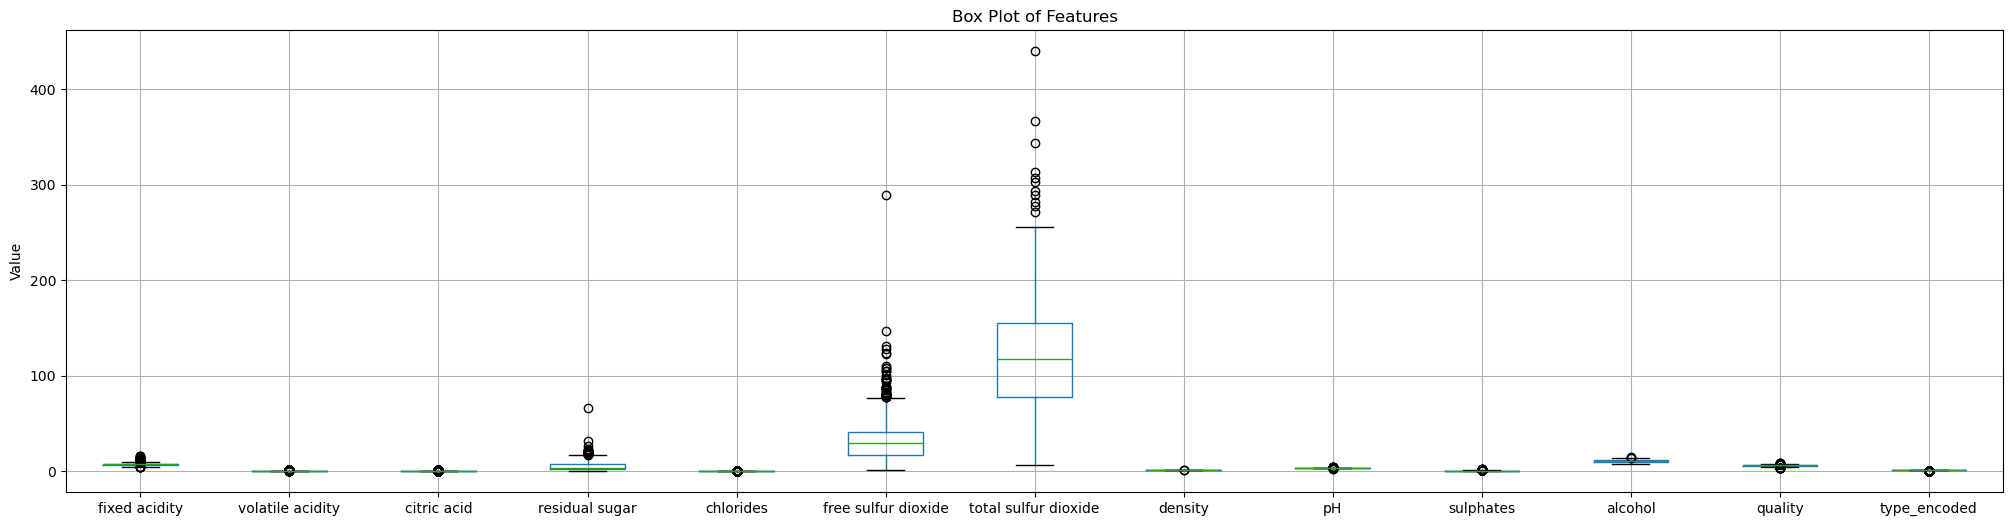

In [10]:
#Create a box plot for each variable to check for outliers
plt.figure(figsize=(25, 6))
df_wine_train.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.show()

In [13]:
#displaying some basic statistics about the train data frame using .describe() keyword
df_wine_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_encoded
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,7.224709,0.338717,0.320658,5.408247,0.055603,30.422916,115.718276,0.994682,3.217277,0.531172,10.493832,5.817022,0.754783
std,1.280764,0.163757,0.145906,4.786129,0.034542,17.747184,56.565059,0.003027,0.160377,0.149151,1.193236,0.879918,0.430263
min,4.200000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.250000,0.992300,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,155.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


checking and working on the test data set

In [14]:
#preview of the test data frame
display(df_wine_test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,6.6,0.390,0.38,9.70,0.053,49.0,226.0,0.99787,3.30,0.57,9.4,white,6
1,8.9,0.120,0.45,1.80,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,red,7
2,15.0,0.210,0.44,2.20,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,red,7
3,6.2,0.300,0.49,11.20,0.058,68.0,215.0,0.99656,3.19,0.60,9.4,white,6
4,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,white,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6.4,0.310,0.28,2.50,0.039,34.0,137.0,0.98946,3.22,0.38,12.7,white,6
1946,6.4,0.260,0.21,8.20,0.050,51.0,182.0,0.99542,3.23,0.48,9.5,white,5
1947,6.9,0.190,0.33,1.60,0.043,63.0,149.0,0.99250,3.44,0.52,10.8,white,5
1948,7.3,0.130,0.32,14.40,0.051,34.0,109.0,0.99740,3.20,0.35,9.2,white,6


In [15]:
# profilling the test data frame
df_wine_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1950 non-null   float64
 1   volatile acidity      1950 non-null   float64
 2   citric acid           1950 non-null   float64
 3   residual sugar        1950 non-null   float64
 4   chlorides             1950 non-null   float64
 5   free sulfur dioxide   1950 non-null   float64
 6   total sulfur dioxide  1950 non-null   float64
 7   density               1950 non-null   float64
 8   pH                    1950 non-null   float64
 9   sulphates             1950 non-null   float64
 10  alcohol               1950 non-null   float64
 11  type                  1950 non-null   object 
 12  quality               1950 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 198.2+ KB


In [17]:
#Encoding the non-numeric column in the test dataframe
df_wine_test['type_encoded'] = label_encoder.fit_transform(df_wine_test['type'])

In [18]:
df_wine_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
type_encoded            0
dtype: int64

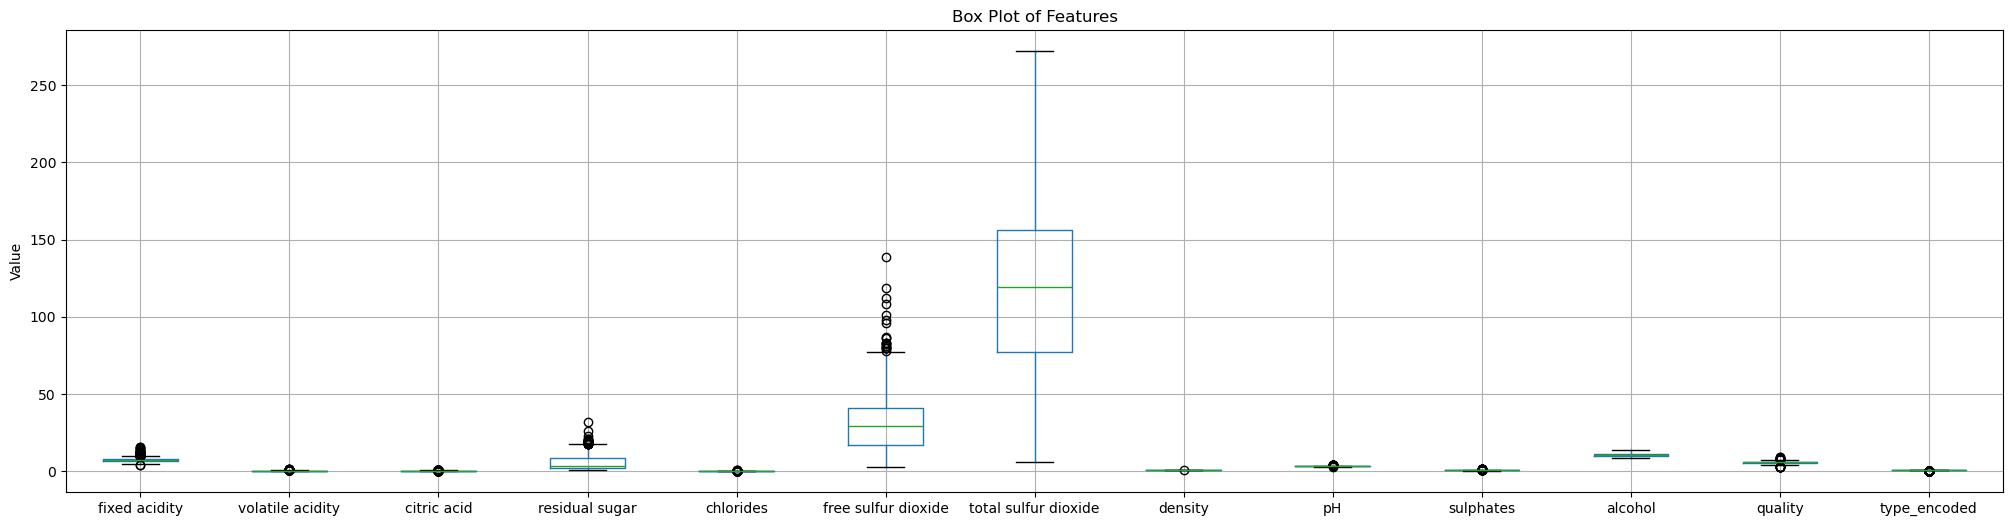

In [19]:
#Create a box plot for each variable to check for outliers
plt.figure(figsize=(25, 6))
df_wine_test.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.show()

Machine Learning
Linear Regression
Ridge Regression
Lasso Regression

In [20]:
# Define features and target
x_train = df_wine_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','type_encoded']]
y_train = df_wine_train[['quality']]

x_test = df_wine_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','type_encoded']]
y_test = df_wine_train[['quality']]

In [21]:
# Initialize the scaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)
y_pred_linear = linear_model.predict(x_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(x_test_scaled)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(x_test_scaled)

In [25]:

y_test_array = y_test.to_numpy()

# Ensure all arrays are one-dimensional
y_test_array = y_test_array.flatten()
y_pred_linear = y_pred_linear.flatten()
y_pred_ridge = y_pred_ridge.flatten()
y_pred_lasso = y_pred_lasso.flatten()


comparison_df = pd.DataFrame({
    'Actual': y_test_array,
    'Linear_Predicted': y_pred_linear,
    'Ridge_Predicted': y_pred_ridge,
    'Lasso_Predicted': y_pred_lasso
})

print(comparison_df.head(30))

    Actual  Linear_Predicted  Ridge_Predicted  Lasso_Predicted
0        6          5.999188         5.998644         5.934931
1        6          6.286191         6.286501         6.151755
2        7          6.924380         6.924493         6.544005
3        7          5.472429         5.472902         5.645529
4        5          5.347042         5.348292         5.666455
5        6          6.329967         6.330287         6.166397
6        6          6.084488         6.085054         6.038794
7        6          5.324559         5.325241         5.650119
8        7          6.535866         6.535398         6.201292
9        5          5.775319         5.775859         5.688438
10       7          6.330490         6.330197         6.164775
11       6          6.331328         6.331677         6.226367
12       5          5.340443         5.341095         5.797899
13       6          5.632128         5.632560         5.630696
14       6          5.603804         5.603914         5

In [26]:
# Evaluate the models
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name}:")
    print(f'MSE: {mse}\n')
    

evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Linear Regression:
MSE: 0.5486929117585682

Ridge Regression:
MSE: 0.5486940905407148

Lasso Regression:
MSE: 0.6097489368146511



Optimising the Lasso model -selecting the best hyperparameter and ensuring the model is properly trained

Hyperparameter Tuning: can be done by Grid search, RAndom search and cross-validation

Grid Search: Perform a grid search over a range of alpha values to find the optimal value that minimizes the error.
Random Search: Perform a random search over a range of alpha values. This can be more efficient than a grid search.
Cross-Validation: Use cross-validation in conjunction with grid search or random search to ensure that the selected alpha value generalizes well to unseen data

In [27]:
#Hyperparameter Tuning using Grid Search with cross validation

# Define the parameter grid
lasso_param_grid = {'alpha': np.logspace(-4, 1, 50)}

# Initialize GridSearchCV with Lasso model
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
lasso_grid_search.fit(x_train_scaled, y_train)


# Best parameter
best_alpha = lasso_grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Best model
best_lasso_model = lasso_grid_search.best_estimator_


Best alpha: 0.0008286427728546842


Regularization Path:

LassoCV: The LassoCV class in sklearn automatically selects the best alpha value by performing cross-validation. It computes the regularization path and selects the alpha that minimizes the cross-validation error

In [28]:
# Initialize LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5)

# Fit the model
lasso_cv.fit(x_train_scaled, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha from LassoCV: {best_alpha}")

# Best model
best_lasso_model = lasso_cv


Best alpha from LassoCV: 0.0008286427728546842


c:\Users\rajim\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Both GridsearchCV and LassoCV gave the same value of best alpha using.

optimising the Ridge regression

In [30]:
# Define the parameter grid
param_grid = {'alpha': np.logspace(-4, 1, 50)}

# Initialize GridSearchCV with Ridge model
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Best model
best_ridge_model = grid_search.best_estimator_

Best alpha: 10.0


In [31]:
# Generate predictions
# Fit the model
y_pred_lasso_opt = best_lasso_model.predict(x_test_scaled)
y_pred_ridge_opt = best_ridge_model.predict(x_test_scaled)

In [33]:

#y_test_array = y_test.to_numpy()

# Ensure all arrays are one-dimensional
#y_test_array = y_test_array.flatten()
y_pred_ridge_opt = y_pred_ridge.flatten()
y_pred_lasso_opt = y_pred_lasso.flatten()


comparison_opt_df = pd.DataFrame({
    'Actual': y_test_array,
    'Linear_Predicted': y_pred_linear,
    'Ridge_Predicted_opt': y_pred_ridge_opt,
    'Lasso_Predicted_opt': y_pred_lasso_opt
})

print(comparison_opt_df.head(30))

    Actual  Linear_Predicted  Ridge_Predicted_opt  Lasso_Predicted_opt
0        6          5.999188             5.998644             5.934931
1        6          6.286191             6.286501             6.151755
2        7          6.924380             6.924493             6.544005
3        7          5.472429             5.472902             5.645529
4        5          5.347042             5.348292             5.666455
5        6          6.329967             6.330287             6.166397
6        6          6.084488             6.085054             6.038794
7        6          5.324559             5.325241             5.650119
8        7          6.535866             6.535398             6.201292
9        5          5.775319             5.775859             5.688438
10       7          6.330490             6.330197             6.164775
11       6          6.331328             6.331677             6.226367
12       5          5.340443             5.341095             5.797899
13    

In [34]:
# Evaluate the models
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name}:")
    print(f'MSE: {mse}\n')
    

evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Ridge Regression optimised", y_test, y_pred_ridge_opt)
evaluate_model("Lasso Regression optimised", y_test, y_pred_lasso_opt)


Linear Regression:
MSE: 0.5486929117585682

Ridge Regression optimised:
MSE: 0.5486940905407148

Lasso Regression optimised:
MSE: 0.6097489368146511



The linear model still performs better than it two derivatives
Using ElasticNetCV to optimise the Ridge and Laaso Regression

In [35]:
# Initialize ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas=np.logspace(-4, 1, 50), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)

# Fit the model
elastic_net_cv.fit(x_train_scaled, y_train)

# Best alpha and ratio
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f"Best alpha from ElasticNetCV: {best_alpha}")
print(f"Best l1_ratio from ElasticNetCV: {best_l1_ratio}")

# Best model
best_elastic_net_model = elastic_net_cv

# Predict
y_pred_elastic_net = best_elastic_net_model.predict(x_test_scaled)

# Calculate and print performance metrics
elastic_net_mse = mean_squared_error(y_test, y_pred_elastic_net)
print("Elastic Net MSE:", elastic_net_mse)



c:\Users\rajim\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha from ElasticNetCV: 0.00339322177189533
Best l1_ratio from ElasticNetCV: 0.1
Elastic Net MSE: 0.5489557033051197


Still, the linear regression performs better than the elastic net.
The Linear regression would be used for feature selection and deployment

Feature Selection

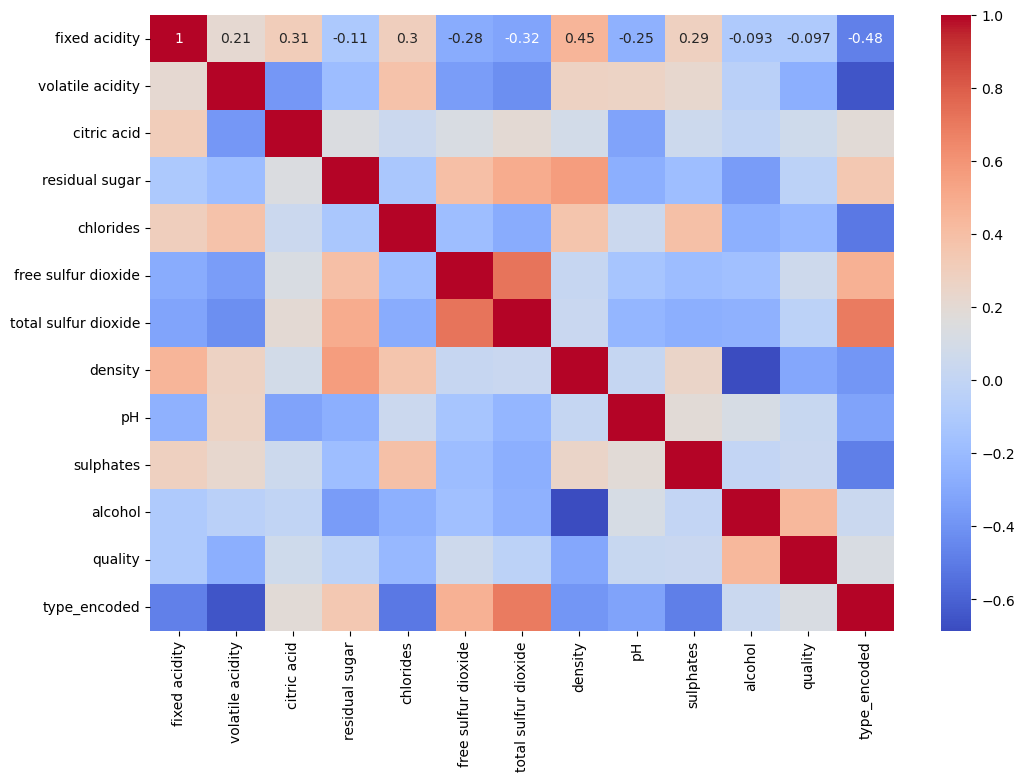

In [38]:
# Compute the correlation matrix

numeric_df = df_wine_train.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Univariate Selection - Using statistical tests to select features with the highest correlation with the target variable

In [41]:

# Define feature and target variables
X = df_wine_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                   'alcohol', 'type_encoded']]
y = df_wine_train['quality']

# Apply SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k=10)  # select top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol', 'type_encoded'],
      dtype='object')


In [43]:
# Define the model
model = LinearRegression()

# Initialize RFE with the model and number of features to select
rfe = RFE(model, n_features_to_select=10)

# Fit RFE
rfe.fit(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'type_encoded'],
      dtype='object')


Serialise the model

In [75]:
# Serialize the model using pickle
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

# Serialize the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)